<a href="https://colab.research.google.com/github/ysjbluemoon/Data-Mining/blob/master/Presentation/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restricted Boltzmann Machine features for digit classification



## Data Processing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
x_test.shape

(10000, 28, 28)

Since Sklearn expects 2d num arrays for the training dataset for a fit function. So, let's reshape the data.

In [0]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

Define a function that plots the digits:

In [0]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

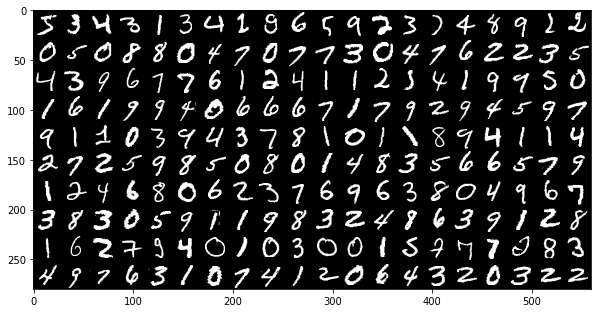

In [56]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(x_train))

## Fit a Restricted Boltzmann Machine (RBM) to MNIST dataset for non-linear feature extraction.

- Fit RBM for feature extraction
- Fit a simple logistic model for prediction
- Get the accuracy from test dataset

## Usage of BernoulliRBM()
- n_components : 
number of binary hidden units.

- learning_rate : learning rate for weight updates. It is highly recommended to tune this hyper-parameter. 

- batch_size : number of examples per minibatch.
- n_iter : number of iterations/sweeps over the training dataset to perform during training.
- verbose : the verbosity level. The default, zero, means silent mode.
- random_state : set seed

In [0]:
from sklearn.neural_network import BernoulliRBM
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
from sklearn.base import clone


rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1,
                                           multi_class='multinomial')
rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

In [58]:
rbm_features_classifier.fit(x_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.67, time = 15.52s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.63, time = 17.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -93.16, time = 17.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.40, time = 17.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -86.03, time = 17.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.08, time = 16.97s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.09, time = 17.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.59, time = 17.26s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.00, time = 17.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -80.32, time = 17.04s


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.01,
                              n_components=100, n_iter=10, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=1, verbose=0,
                                    warm_start=False))],
         verbose=False)

Predict the digits in the test dataset.

In [0]:
y_pred = rbm_features_classifier.predict(x_test)

Compute the values of goodness of fit:

In [60]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.91      0.92      0.92      1010
           4       0.93      0.93      0.93       982
           5       0.93      0.90      0.91       892
           6       0.95      0.96      0.95       958
           7       0.94      0.93      0.93      1028
           8       0.90      0.91      0.90       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000




Define a function to compute the confusion matrix:

In [0]:
from sklearn.metrics import confusion_matrix 
import itertools


cm = confusion_matrix(y_test, y_pred)

# Write a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plot the confusion matrix:

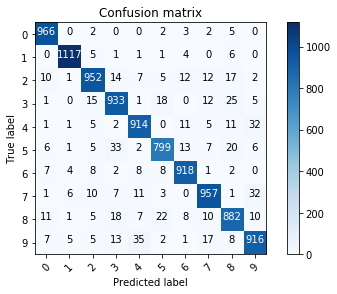

In [62]:
plot_confusion_matrix(cm, classes = range(10))

## Plot the 100 features extracted by RBM
Use BernoulliRBM.components_ to get teh extracted components after fitting the model.

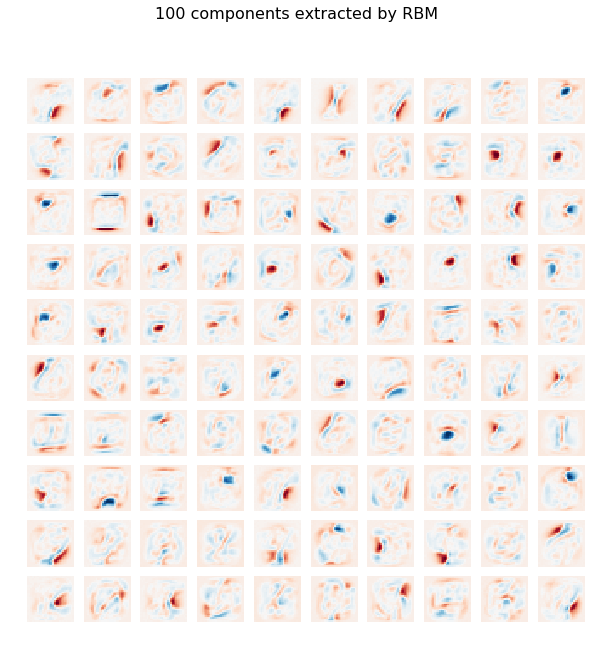

In [63]:
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);


Reference:
1. https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist
2. https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py